In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic_train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


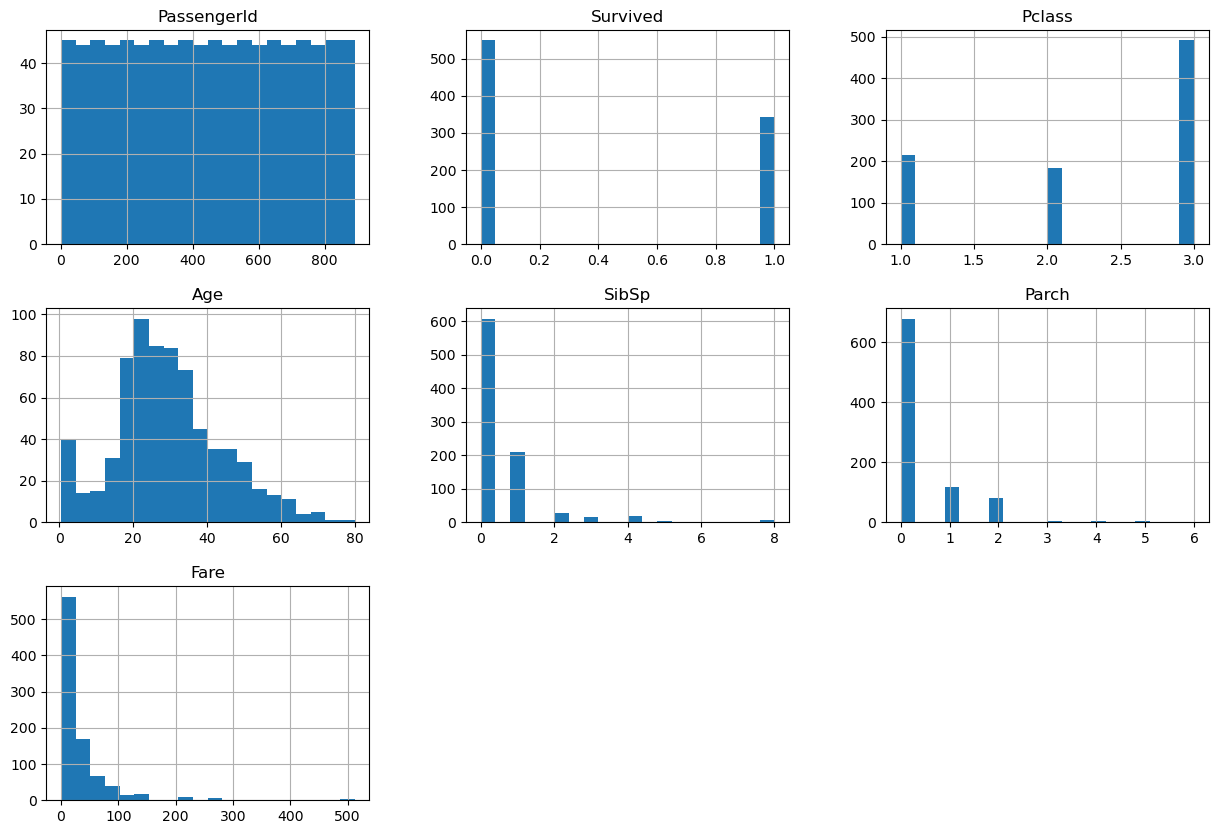

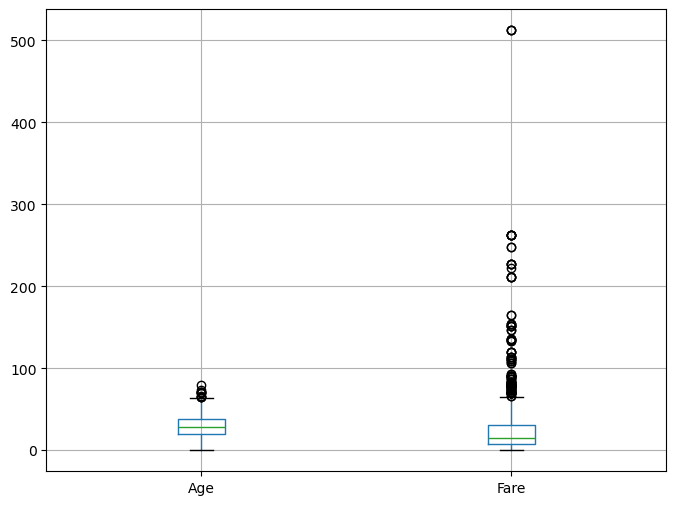

In [12]:
#EDA

import matplotlib.pyplot as plt
# Plot histograms of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Plot box plots to see distribution and outliers
df[['Age', 'Fare']].boxplot(figsize=(8,6))
plt.show()



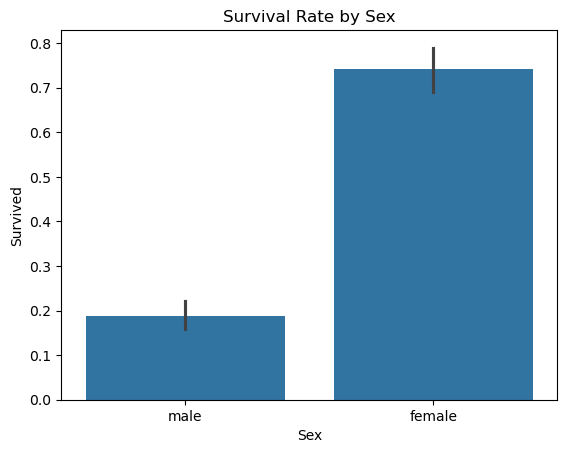

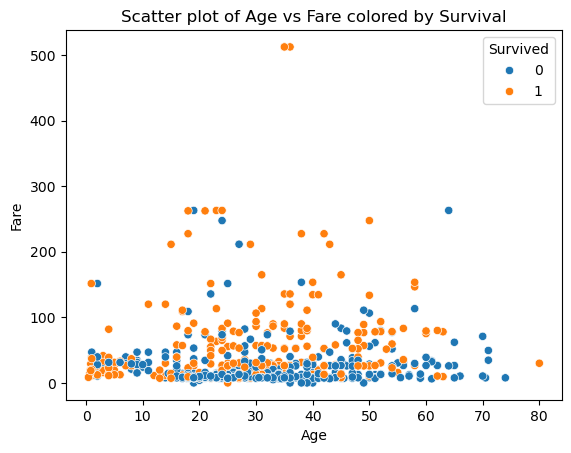

In [14]:
# Bar plot of survival rate by Sex
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Scatter plot for Age vs Fare and color by Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter plot of Age vs Fare colored by Survival')
plt.show()


In [129]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Sex_male_True    891 non-null    bool   
 7   Embarked_Q_True  891 non-null    bool   
 8   Embarked_S_True  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [16]:
#Data Processing
#missing Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer

# Impute missing 'Age' with the median value
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Impute missing 'Embarked' with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Option 2: Drop the 'Cabin' column entirely (recommended due to large number of missing values)
df.drop(columns=['Cabin'], inplace=True)


In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
print(df.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [36]:
# One-hot encode categorical features like 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex_male', 'Embarked_Q','Embarked_S' ], drop_first=True)

# Drop irrelevant columns for modeling
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [133]:
#LGBM classification and hyperparameter  Tuning
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data: Replace this with your actual dataset
# X: feature matrix, y: target variable (0 for negative class, 1 for positive class)
X = np.random.rand(712, 8)  # 712 samples, 8 features
y = np.array([0] * 444 + [1] * 268)  # 444 negative, 268 positive

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Set the parameters for the model
params = {
    'boosting_type': 'gbdt',  # Use GBDT boosting
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,  # Adjust this based on your data
    'learning_rate': 0.05,
    'min_data_in_leaf': 10,  # Reduce this to allow more splits
    'scale_pos_weight': len(y_train) / (2 * np.sum(y_train)),  # Adjust for class imbalance
    'max_depth': -1,  # No limit on depth
    'verbose': -1,  # Suppress detailed output
}

# Train the model with early stopping
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=100)

# Predict on validation set
y_pred = model.predict(X_valid)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)  # Convert probabilities to binary outcomes

# Print classification report
print(classification_report(y_valid, y_pred_binary))


              precision    recall  f1-score   support

           0       0.66      0.75      0.70        89
           1       0.46      0.35      0.40        54

    accuracy                           0.60       143
   macro avg       0.56      0.55      0.55       143
weighted avg       0.58      0.60      0.59       143



In [127]:
import numpy as np
from collections import Counter

# Check the distribution of the target variable
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_valid))


Training class distribution: Counter({0: 355, 1: 214})
Validation class distribution: Counter({0: 89, 1: 54})


In [119]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

# Sample data: Replace this with your actual dataset
X = np.random.rand(712, 8)  # 712 samples, 8 features
y = np.array([0] * 444 + [1] * 268)  # 444 negative, 268 positive

# Split data into training and validation sets using stratified sampling
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution
print("Training class distribution:", Counter(y_train))
print("Validation class distribution:", Counter(y_valid))

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Calculate scale_pos_weight
scale_pos_weight = len(y_train) / (2 * np.sum(y_train))
print("Scale positive weight:", scale_pos_weight)

# Set the parameters for the model
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Evaluation metric
    'max_depth': 6,  # Adjust based on your data
    'learning_rate': 0.05,
    'subsample': 0.8,  # Randomly sample training data
    'colsample_bytree': 0.8,  # Randomly sample features
    'scale_pos_weight': scale_pos_weight,  # Adjust for class imbalance
    'verbosity': 0,  # Suppress detailed output
}

# Train the model with early stopping
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]  # Track training and validation metrics
model = xgb.train(params, dtrain, num_boost_round=100, evals=watchlist, early_stopping_rounds=10)

# Predict on validation set
y_pred = model.predict(dvalid)

# Adjust the threshold for binary classification
threshold = 0.3  # Change this value as needed
y_pred_binary = np.where(y_pred >= threshold, 1, 0)  # Convert probabilities to binary outcomes

# Print classification report with zero_division handling
print(classification_report(y_valid, y_pred_binary, zero_division=0))


Training class distribution: Counter({0: 355, 1: 214})
Validation class distribution: Counter({0: 89, 1: 54})
Scale positive weight: 1.3294392523364487
[0]	train-logloss:0.66820	eval-logloss:0.67090
[1]	train-logloss:0.65854	eval-logloss:0.67446
[2]	train-logloss:0.65329	eval-logloss:0.67507
[3]	train-logloss:0.64488	eval-logloss:0.67160
[4]	train-logloss:0.63755	eval-logloss:0.67546
[5]	train-logloss:0.63484	eval-logloss:0.67527
[6]	train-logloss:0.62624	eval-logloss:0.67806
[7]	train-logloss:0.62152	eval-logloss:0.67827
[8]	train-logloss:0.61385	eval-logloss:0.67896
[9]	train-logloss:0.60739	eval-logloss:0.68234
[10]	train-logloss:0.60251	eval-logloss:0.68451
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.38      1.00      0.55        54

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.27       143
weighted avg       0.14      0.38      0.21       143



In [121]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Evaluate both models
metrics_lgbm = evaluate_model(y_test, y_pred_lgbm)
metrics_xgb = evaluate_model(y_test, y_pred_xgb)

# Display the results
print("LightGBM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_lgbm))
print("XGBoost  - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_xgb))


LightGBM - Accuracy: 0.8268, Precision: 0.7945, Recall: 0.7838, F1-score: 0.7891
XGBoost  - Accuracy: 0.8212, Precision: 0.8000, Recall: 0.7568, F1-score: 0.7778


In [123]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV for LightGBM
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=lgbm_param_grid, 
                         scoring='accuracy', cv=5)
grid_lgbm.fit(X_train, y_train)

# Hyperparameter tuning using GridSearchCV for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_param_grid, 
                        scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)

# Best parameters and accuracy from grid search
print("Best parameters for LightGBM:", grid_lgbm.best_params_)
print("Best parameters for XGBoost:", grid_xgb.best_params_)



Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [125]:
#Comparitive Analysis
# Get the best models from grid search
best_lgbm = grid_lgbm.best_estimator_
best_xgb = grid_xgb.best_estimator_

# Predict on the test set with tuned models
y_pred_best_lgbm = best_lgbm.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the tuned models
metrics_best_lgbm = evaluate_model(y_test, y_pred_best_lgbm)
metrics_best_xgb = evaluate_model(y_test, y_pred_best_xgb)

# Display the comparison
print("Tuned LightGBM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_best_lgbm))
print("Tuned XGBoost  - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*metrics_best_xgb))


Tuned LightGBM - Accuracy: 0.5754, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Tuned XGBoost  - Accuracy: 0.3408, Precision: 0.3070, Recall: 0.4730, F1-score: 0.3723
